In [1]:
%matplotlib notebook

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from tqdm.autonotebook import tqdm


from sdeint import itoint, stratint

# ODE 

<IPython.core.display.Javascript object>


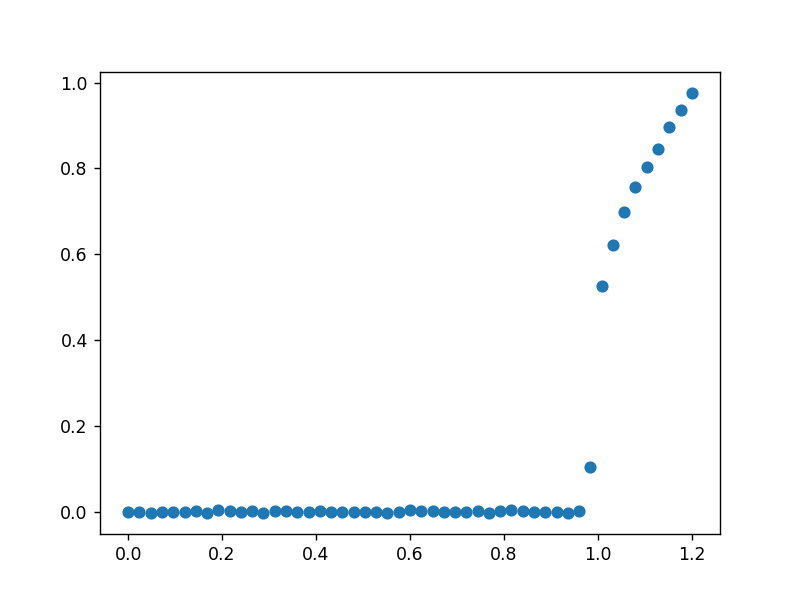

In [388]:
class JJ():
    
    def __init__(self, Ej = 1, Ec = 1, R = 1e10):
        
        Rq = 6.5e3
        
        self.Ec = Ec
        self.Ej = Ej
        self.R = R
        
        self.wp = np.sqrt(8*Ej*Ec) 
        self.Q  = np.pi*R/Rq * np.sqrt(Ej/2/Ec)
        
            

            
            
#     def dX_dt(self, X, t, ib):
        
#         Q = self.Q
#         wp = self.Q

#         ϕ    = X[0]
#         ϕdot = X[1]

        
#         dϕdt = ϕdot
        
# #         d2ϕdt2 = (ib  - np.sin(ϕ) - dϕdt/Q/wp)*wp**2
#         d2ϕdt2 = ib - np.sin(ϕ)- dϕdt

#         return np.array([dϕdt, d2ϕdt2])
    def dX_dt(self,  X, t, ib):

        ϕ    = X[0]
        ϕdot = X[1]

        dϕdt = ϕdot

        d2ϕdt2 =  ib - np.sin(ϕ)- dϕdt/1

        return np.array([dϕdt, d2ϕdt2])
    
    def gen_dX_dt(self, ib):
        
        dX_dt = lambda X,t : self.dX_dt(X,t, ib = ib)
        
        return dX_dt

    
    def G(self, x, t):
        B = np.diag([0.5, 0.0]) # diagonal, so independent driving Wiener processes
        return 1*B/10
    
    
    def get_phase_dyn(self, X0, ib, VERBOSE = False):

        
        ts =  np.linspace(0.0, 1000.0, 100001)
        
        dX_dt = self.gen_dX_dt(ib)
        
#         Us = odeint(dX_dt, X0, ts)
        Us = stratint(dX_dt, self.G, X0, ts)
        
        ϕs = Us[:, 0]
        
        Vs = Us[:, 1]
        
        
        if VERBOSE:
            fig, axs = plt.subplots(3,1)
            
            axs[0].plot(ts, ϕs)
            axs[1].plot(ts, Vs)
            axs[2].plot(ϕs%(2*np.pi), Vs)
        
        return ts, ϕs, Vs
    
    
    
    def Iscan(self, i_list  ):
        
        Vs = []
        
        ti_list = tqdm(i_list)
        
        for ib in ti_list: 
            
            if abs(ib) < 1:
                ϕ0 = np.arcsin(ib)
            else:
                ϕ0 = 0
            
            X0 = np.array([float(ϕ0), float(0)])
            t, ϕ, V = self.get_phase_dyn(X0 , ib = ib)
            
            Vavg = np.mean(V[int(len(V)/10):])
            
            Vs.append(Vavg)
            
        return np.array(Vs)
    
        

jj = JJ(Ej = 3, Ec = 0.01, R = 1e3)


i_list = np.linspace(0, 1.2, 51)
Vs = jj.Iscan( i_list )

fig, ax = plt.subplots()
ax.plot(i_list,Vs, 'o')

In [366]:
jj.gen_dX_dt(0.1)(X0, ts)

array([ 2.        , -2.80929743])

In [323]:
dX_dt(X0, ts)

array([0.        , 0.25852902])

In [364]:
jj.G(X0, ts)

array([[0., 0.],
       [0., 0.]])

In [ ]:
np.abs

<IPython.core.display.Javascript object>


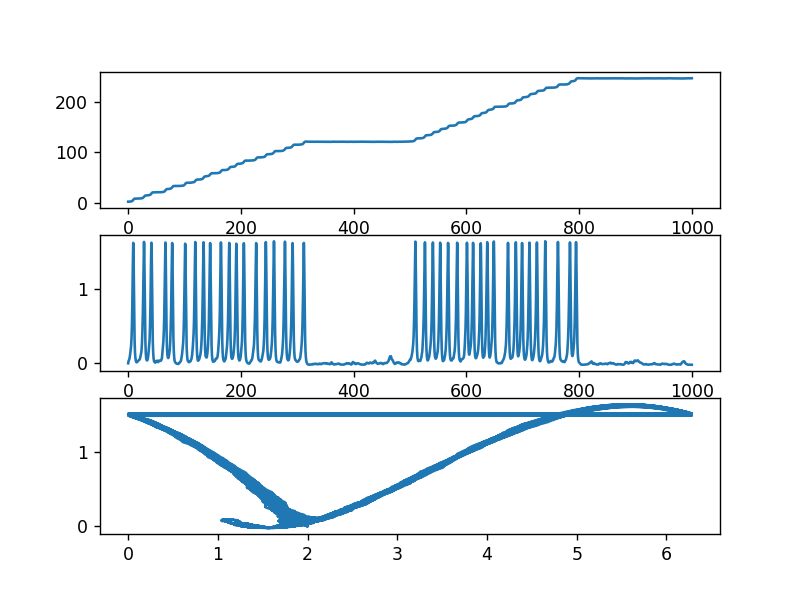

In [396]:
ib = 0.98
X0 = np.array([2.,0.])



res = jj.get_phase_dyn( X0, ib = ib, VERBOSE = True)

# SDEINT

In [179]:
A.dot(x0)

array([  3., -90.])

<IPython.core.display.Javascript object>


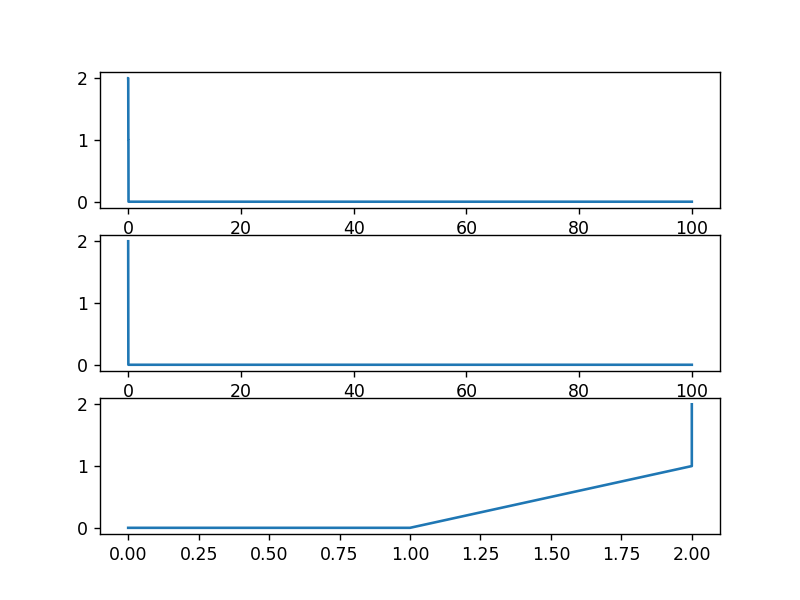

(array([0.000e+00, 1.000e-02, 2.000e-02, ..., 9.998e+01, 9.999e+01,
        1.000e+02]),
 array([2, 2, 1, ..., 0, 0, 0]),
 array([2, 1, 0, ..., 0, 0, 0]))

In [369]:


tspan = np.linspace(0.0, 100.0, 10001)
x0 = np.array([2.0, 0.0])



def dX_dt( X, t, ib):
    
    ϕ    = X[0]
    ϕdot = X[1]

    dϕdt = ϕdot

    d2ϕdt2 =  ib - np.sin(ϕ)- dϕdt

    return np.array([dϕdt, d2ϕdt2])


def gen_dX_dt( ib):

    f = lambda X,t : dX_dt(X,t, ib = ib)

    return f

def G(x, t):
    B = np.diag([0.5, 0.0]) # diagonal, so independent driving Wiener processes
    return 1*B


def get_phase_dyn( X0, ib, VERBOSE = False):


    ts =  np.linspace(0.0, 100.0, 10001)

    dX_dt = gen_dX_dt(ib)

    Us = stratint(dX_dt, G, X0, ts)

    ϕs = Us[:, 0]

    Vs = Us[:, 1]


    if VERBOSE:
        fig, axs = plt.subplots(3,1)

        axs[0].plot(ts, ϕs)
        axs[1].plot(ts, Vs)
        axs[2].plot(ϕs%(2*np.pi), Vs)

    return ts, ϕs, Vs


get_phase_dyn( X0, ib = 1, VERBOSE = True)


# result = stratint(gen_dX_dt(.1), G, x0, tspan)
# # result = itoint(f, G, x0, tspan)

# fig, ax = plt.subplots()


# ϕ = result[:,0]
# ax.plot(tspan,ϕ )

In [370]:
X0

array([2, 2])

In [371]:
x0

array([2., 0.])

<IPython.core.display.Javascript object>


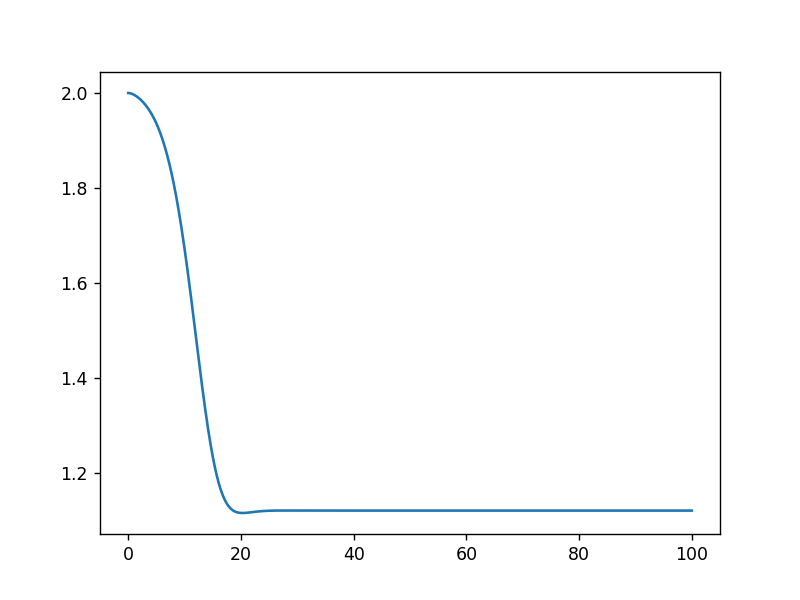

In [330]:
fig, ax = plt.subplots()


ϕ = result[:,0]
ax.plot(tspan,ϕ )

## Example from ...

<IPython.core.display.Javascript object>


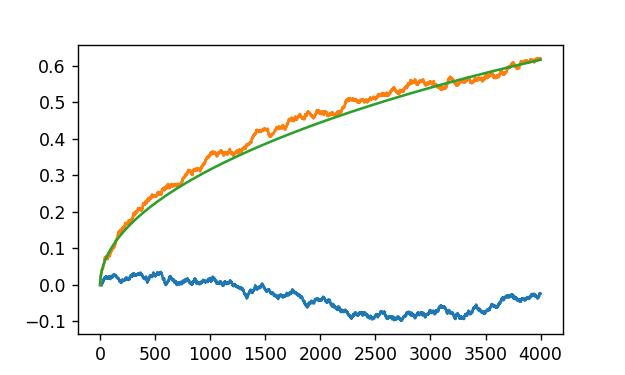

In [8]:


def run(x0=np.array([.0,.0]), n=4000, dt=1.0E-04, omega=1.0):

    sol = np.array([])

    M = np.array([[0, 1.],[-omega**2, 0.]])

    x = x0.copy()
    for i in range(0,n):
        sol = np.append(sol, x[0])
        x += M @ x * dt + np.array([1.,0.]) * np.random.normal(scale=np.sqrt(dt))


    return sol

sol = np.array([run() for i in range(0,50)])

mean  = np.mean(sol, axis=0)
sigma = np.sqrt(np.var(sol, axis=0) + mean**2)

dt = 1.0E-04
x = np.arange(0, len(mean))
y = np.sqrt(x * dt/2. + np.sin(2. * x * dt)/4.)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,3))


ax.plot(x, mean)
ax.plot(x, sigma)
ax.plot(x, y)
plt.show()